# Введение

Допустим, вы работаете в кредитном отделе крупного банка. Каждый день приходят заявки на кредит. Нужно понять, стоит ли выдавать займ. Вы наняли сотрудников, которые смотрят заявки и ставят оценку от 0 до 100.<br>
0 — плохой кандидат<br>
100 — отличный кандидат, кредит дать сразу.<br>
Сотрудники справляются, но заявок всё больше и вы хотите оценивать кандидатов автоматически. Что делать? Можно использовать ML. Но сначала нужно перевести задачу на язык машинного обучения: если есть история дефолтов, алгоритм может «учиться» на ней. Это называется **обучением с учителем (Supervised Learning)**.

При обучении с учителем алгоритму нужны примеры, на которых учиться. То, что мы предсказываем, называют **целевой переменной** (target, в статистике — зависимая переменная) и обычно обозначают буквой `y`. В примере с банком это могут быть исторические дефолты. Одних значений `y` мало — нужны ещё характеристики объектов: доход, возраст, пол тех, кто не вернул кредит. Эти характеристики называют **признаками** (features) и обозначают `x`; если признаков несколько — `x1`, `x2` и т.д.

Теперь у вас есть почти всё, что нужно, чтобы обучить ML-алгоритм.

## Практика

- С прошлого года производительность цеха падает из‑за поломок оборудования. Цель — поднять общую производительность, снизив поломки на 30%.
- Оценить вероятность сердечных заболеваний у человека без похода в больницу.
- Банк получает 20 жалоб на несанкционированные онлайн-платежи. Нужно сократить такие операции; допустимо, если проверка увеличит время транзакции на 30 секунд.

# Функции

С одной стороны — признаки (x), с другой — целевая переменная (y). Их нужно как‑то связать. Для этого нужны **функции**.

$$f(x) = F(x_1, x_2, ..., x_n)$$

    Предположим, что целевая переменная и признаки связаны линейно. Тогда функцию задаём так:<br>
$$ \large f(x) = \sum_{i=0}^m w_i x_{i}$$
где: <br>
- $x_0 = 1$
- $y \approx f(x)$
- $x_n$ — наши признаки
- $w_n$ — неизвестные веса, их нужно найти

# МНК (метод наименьших квадратов)

Есть целевая переменная `y` и функция `f(x)`, которой мы приближаем `y`. Нужно измерить, насколько `f(x)` близка к `y`, например разностью $|y - f(x)|$. Эту разность хотим сделать как можно меньше — то есть минимизировать. Функцию, которую минимизируем, в ML называют **функцией потерь** (loss, cost). Часто используют не модуль, а **среднеквадратичную ошибку (MSE)** — она удобнее.

$$\begin{split}\Large \begin{array}{rcl}\mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2 
\end{array}\end{split} $$

### Что значит оптимизация?

Нужно найти такое значение параметров, при котором функция потерь минимальна.

### Как это сделать?

Взять производную функции потерь по параметрам и приравнять к нулю.

## Аналитический способ оптимизации

$$\begin{split}\Large \begin{array}{rcl}\mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf X \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf X \textbf{w}\right)^\text{T} \left(\textbf{y} - \textbf X \textbf{w}\right)
\end{array}\end{split}$$

$$\begin{split}\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}\end{split}$$

$$\begin{split}\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}\end{split}$$

В итоге получаем $ \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}$

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=100, n_features=2, random_state=42)

In [2]:


# Now we'll add a column of ones to the design matrix.
# This is the feature that corresponds to the intercept parameter
# in the moddel
# X = np.c_[np.ones(X.shape[0]), X]
xT = np.transpose(X)

# Calculate the inverse of xTx using the numpy linear algebra
# functions
xTx_inv = np.linalg.inv(np.matmul(xT, X))
# formula (xTx_inv)*(xT*y).
ols_params = np.matmul(xTx_inv, np.matmul(xT, y))

In [3]:
ols_params

array([87.73730719, 74.07686178])

У аналитического подхода есть минусы:
- матрица $(X^TX)^{-1}$ может не существовать
- при большом числе признаков вычисления становятся долгими

# Градиентный спуск

Это один из методов оптимизации; есть и другие.

$$w_{i+1} = w_i - \alpha \frac{\partial \mathcal{L}}{\partial \textbf{w}} $$<br>
где<br>
$\alpha$ — шаг обучения (learning rate)

Знак производной задаёт направление движения, модуль — насколько мы далеки от минимума.

In [4]:
np.random.seed(0)
x = np.linspace(-3, 3, 60)
y = 2.0*x + np.random.normal(0, 0.8, size=x.shape)

def loss_fn(x, y, w):
    '''
    Function to compute the empirical risk.
    x is a 1D numpy array of the feature values,
    y is a 1D numpy array of the response values.
    beta is the model parameter value.
    '''
    # Initialize the risk value
    loss = 0.0
    # Loop over the data an increment the risk with
    # a squared-loss
    for i in range(x.shape[0]):
        loss += np.power(y[i]-(w*x[i]), 2.0)
    loss /= x.shape[0]
    return loss

def gd(x, y, w):
    '''
    Function to compute the derivative of the empirical risk
    with respect to the model parameter.
    x is a 1D numpy array of the feature values,
    y is a 1D numpy array of the response values.
    beta is the model parameter value.
    '''
    derivative_risk = 0.0
    for i in range(x.shape[0]):
        # print(2.0*x[i]*(y[i]-(w*x[i])))
        derivative_risk += - (2.0*x[i]*(y[i]-(w*x[i])))
        # print(derivative_risk)
    derivative_risk /= x.shape[0]
    # print(derivative_risk)
    return derivative_risk
eta = 0.05
n_iter=100
# Initialize arrays to hold the sequence of
# parameter estimates and empirical risk values
d=np.full(1+n_iter, np.nan)
w_learn=np.full(1+n_iter, np.nan)
loss_learn=np.full(1+n_iter, np.nan)
# Set the starting estimate for the
# model parameter
w_learn[0]=1.0
# Iterate using the gradient descent update rule
for iter in range(n_iter):
    
    loss_learn[iter] = loss_fn(x,y,w_learn[iter])
    # w_learn[iter+1] = w_learn[iter]
    d[iter] = gd(x, y, w_learn[iter])
    w_learn[iter+1] = w_learn[iter] - eta*d[iter]

/Users/user/PycharmProjects/MLC/.venv/lib/python3.11/site-packages/IPython/core/events.py:96: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/user/PycharmProjects/MLC/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


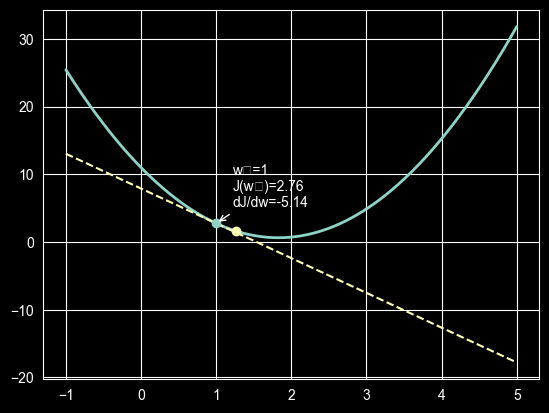

In [5]:
step=0
w_min, w_max = -1.0, 5.0
w_grid = np.linspace(w_min, w_max, 400)
J_grid = np.array([loss_fn(x, y, w) for w in w_grid])
plt.plot(w_grid, J_grid, linewidth=2, label="MSE  J(w)")
tangent = loss_learn[0] + d[0] * (w_grid - 1.0)
plt.plot(w_grid, tangent, linestyle="--")
plt.scatter([w_learn[step]], [loss_learn[step]], zorder=3)
plt.scatter([w_learn[step+1]], [loss_learn[step+1]], zorder=3)
plt.annotate(
    f"w₀={w_learn[step]:.3g}\nJ(w₀)={loss_learn[step]:.3g}\ndJ/dw={d[step]:.3g}",
    (w_learn[step], loss_learn[step]),
    textcoords="offset points",
    xytext=(12, 12),
    arrowprops=dict(arrowstyle="->")
);

[Интерактивная визуализация линейной регрессии](https://observablehq.com/@yizhe-ang/interactive-visualization-of-linear-regression)

# Линейная регрессия в Sklearn

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)
lr.coef_

ValueError: Found input variables with inconsistent numbers of samples: [100, 60]

## Предположения линейной регрессии

- **Линейность:** связь между признаками и целевой переменной должна быть линейной.
- **Независимость ошибок:** остатки не должны быть коррелированы друг с другом.
- **Гомоскедастичность:** дисперсия остатков должна быть постоянной при разных значениях признаков.
- **Нормальность ошибок:** остатки должны быть распределены нормально.